In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

In [3]:
train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low


In [4]:
train_df.shape[0]

49352

In [5]:
test_df.shape[0]

74659

In [6]:
color = sns.color_palette()
sns.set_style("whitegrid")

int_level = train.interest_level.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(int_level.index,int_level.values,alpha=0.9,color=color[1])
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("Interest Level",fontsize=12)
plt.show()

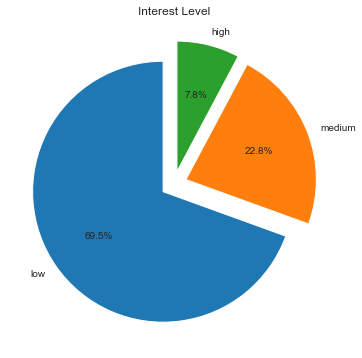

In [7]:
plt.figure(figsize=(6,6))
int_counts = train_df.interest_level.value_counts()
explode=[0.1,0.1,0.1]
patches,texts,autotexts= plt.pie(int_counts,labels=["low","medium","high"],explode=explode,autopct="%1.1f%%",startangle=90)
plt.title("Interest Level")
plt.show()

##### bath_counts = train_df.bathrooms.value_counts()
plt.figure(figsize=(8,4))
sns.barplot(bath_counts.index,bath_counts.values,alpha=0.8,color=color[2])
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("bathrooms",fontsize=12)
plt.show()

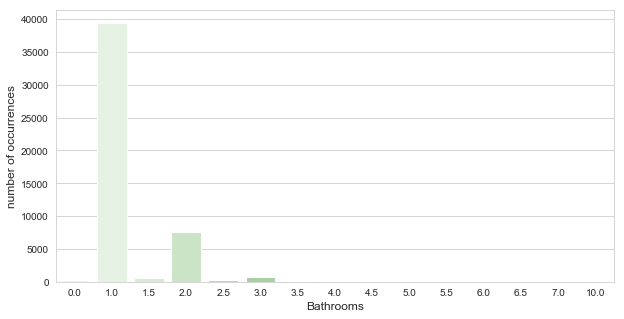

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(train_df["bathrooms"],palette="Greens")
plt.ylabel("number of occurrences",fontsize=12)
plt.xlabel("Bathrooms",fontsize=12)
plt.show()

/Users/chenlu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/chenlu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


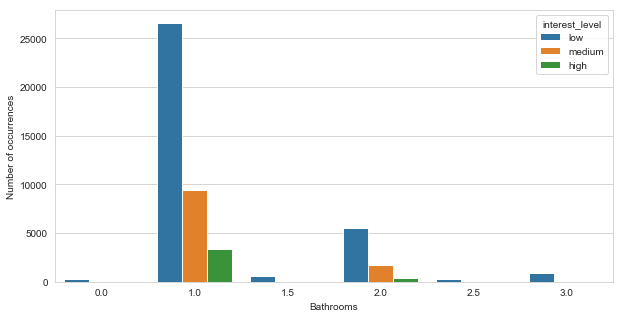

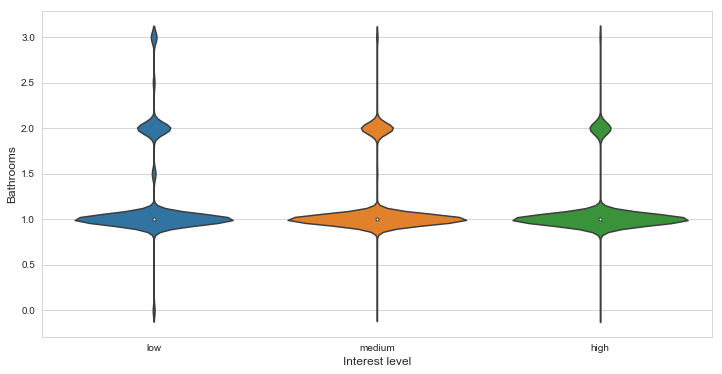

In [9]:
train_df['bathrooms'].loc[train_df['bathrooms']>3]=3
plt.figure(figsize=(10,5))
sns.countplot(train_df['bathrooms'],hue=train_df['interest_level'],hue_order=['low', 'medium', 'high']);
plt.xlabel('Bathrooms');
plt.ylabel('Number of occurrences')

plt.figure(figsize=(12,6))
sns.violinplot(train_df['interest_level'],train_df['bathrooms'],order=["low","medium","high"])
plt.xlabel("Interest level",fontsize=12)
plt.ylabel("Bathrooms",fontsize=12)
plt.show()

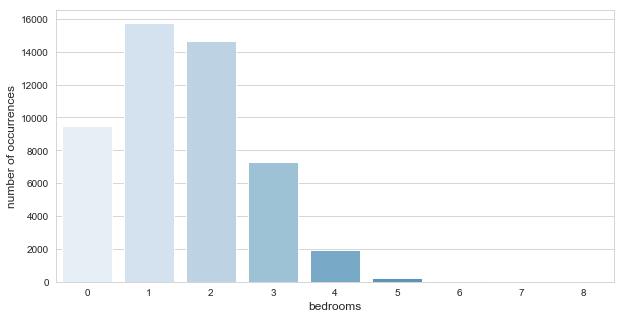

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(train_df["bedrooms"],palette="Blues")
plt.ylabel("number of occurrences",fontsize=12)
plt.xlabel("bedrooms",fontsize=12)
plt.show()

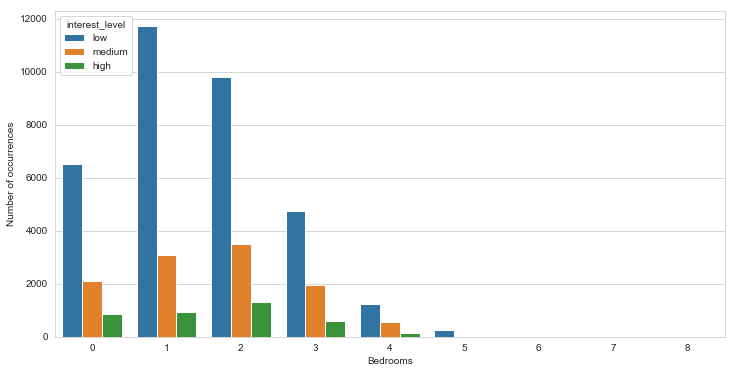

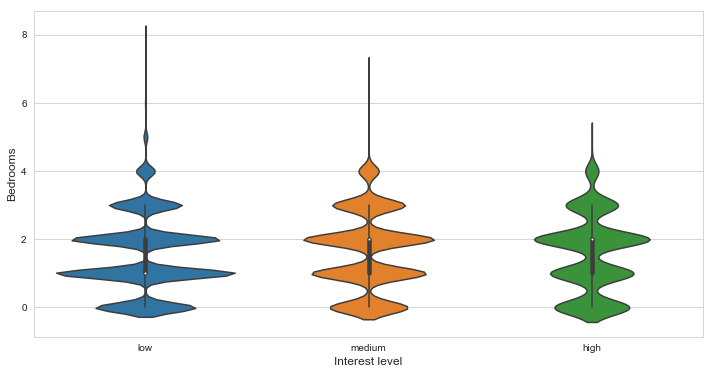

In [11]:
plt.figure(figsize=(12,6))
sns.countplot("bedrooms",hue="interest_level",hue_order=['low', 'medium', 'high'],data=train_df)
plt.xlabel('Bedrooms')
plt.ylabel('Number of occurrences')

plt.figure(figsize=(12,6))
sns.violinplot(train_df['interest_level'],train_df['bedrooms'],order=["low","medium","high"])
plt.xlabel("Interest level",fontsize = 12)
plt.ylabel("Bedrooms",fontsize=12)
plt.show()

In [12]:
'''
plt.figure(figsize=(10,5))
plt.scatter(range(train_df.shape[0]),train_df["price"],color=color[8])
plt.scatter(range(train_df.shape[0]),np.sort(train_df.price.values),color=color[8])
plt.xlabel('index',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.show()
# series train_df.price 
# np.array train_df.price.values 
'''

'\nplt.figure(figsize=(10,5))\nplt.scatter(range(train_df.shape[0]),train_df["price"],color=color[8])\nplt.scatter(range(train_df.shape[0]),np.sort(train_df.price.values),color=color[8])\nplt.xlabel(\'index\',fontsize=12)\nplt.ylabel(\'price\',fontsize=12)\nplt.show()\n# series train_df.price \n# np.array train_df.price.values \n'

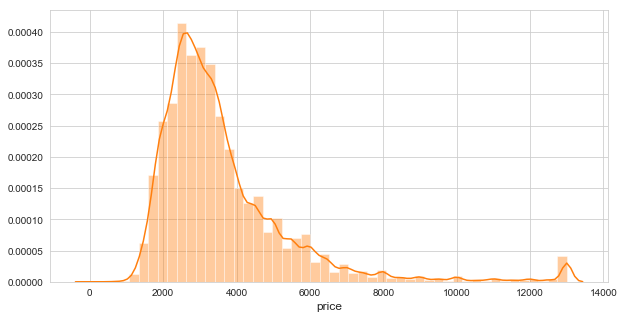

In [13]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].loc[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(10,5))
sns.distplot(train_df['price'],bins=50,kde=True,color=color[1])
plt.xlabel('price', fontsize=12)
plt.show()

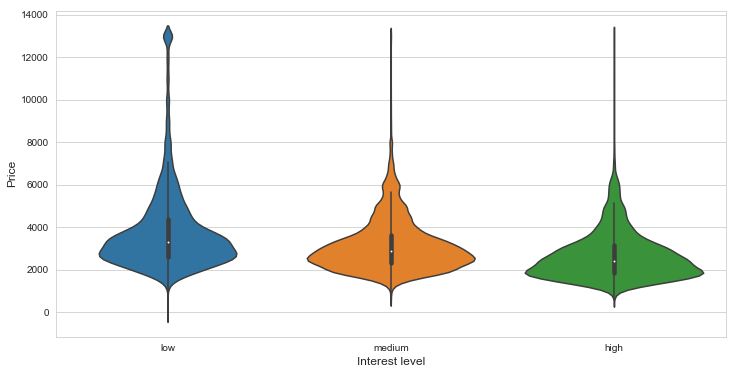

In [14]:
plt.figure(figsize=(12,6))
sns.violinplot(train_df['interest_level'],train_df['price'],order=["low","medium","high"],alpha=0.8)
plt.xlabel("Interest level",fontsize = 12)
plt.ylabel("Price",fontsize=12)
plt.show()

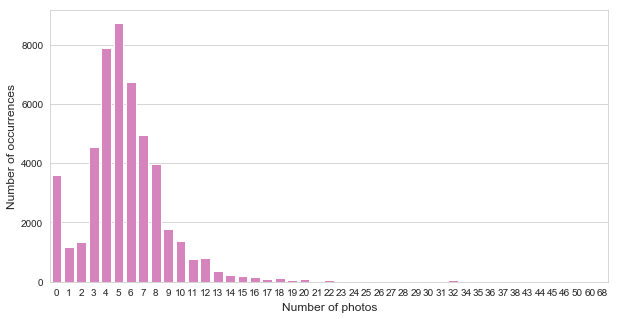

In [15]:
train_df["num_photos"] = train_df["photos"].apply(len)
test_df["num_photos"] = test_df["photos"].apply(len)
plt.figure(figsize=(10,5))
sns.countplot(train_df["num_photos"],color=color[6])
plt.ylabel("Number of occurrences",fontsize=12)
plt.xlabel("Number of photos",fontsize=12)
plt.show()

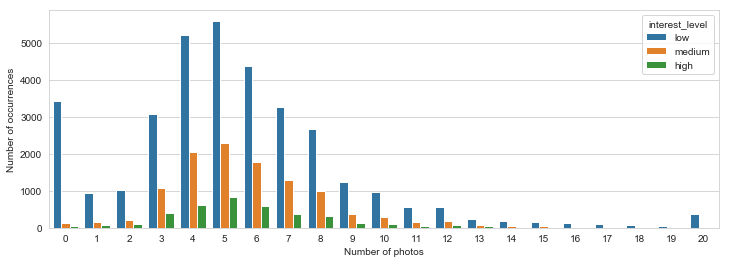

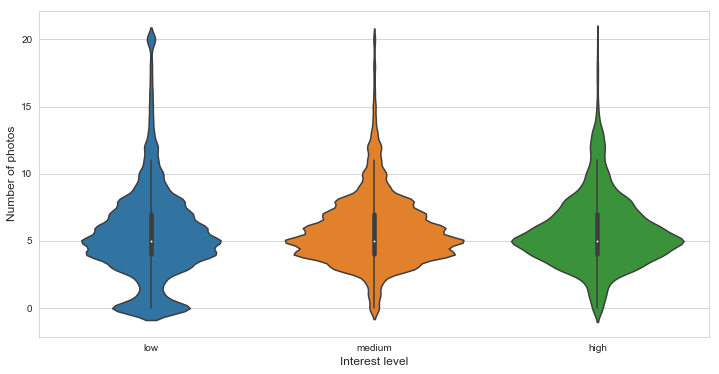

In [16]:
train_df['num_photos'].loc[train_df['num_photos']>20] = 20
plt.figure(figsize=(12,4))
sns.countplot(train_df["num_photos"],hue=train_df['interest_level'],hue_order=['low', 'medium', 'high'])
plt.xlabel('Number of photos')
plt.ylabel('Number of occurrences')

plt.figure(figsize=(12,6))
sns.violinplot(train_df['interest_level'],train_df['num_photos'],order=["low","medium","high"])
plt.xlabel("Interest level",fontsize=12)
plt.ylabel("Number of photos",fontsize=12)
plt.show()

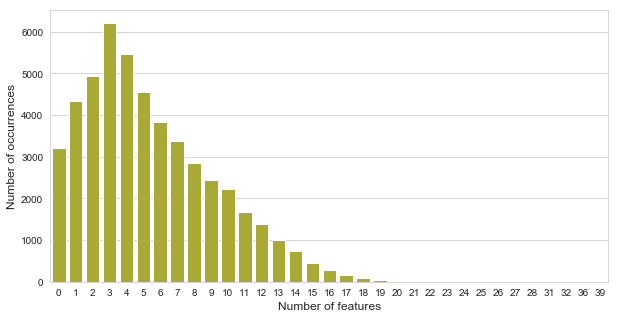

In [17]:
train_df["num_features"] = train_df["features"].apply(len)
test_df["num_features"] = test_df["features"].apply(len)
plt.figure(figsize=(10,5))
sns.countplot(train_df["num_features"],color=color[8])
plt.ylabel("Number of occurrences",fontsize=12)
plt.xlabel("Number of features",fontsize=12)
plt.show()

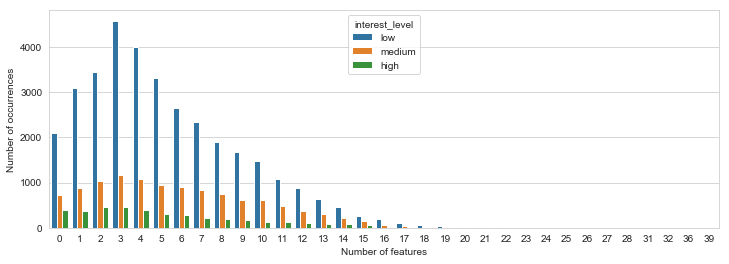

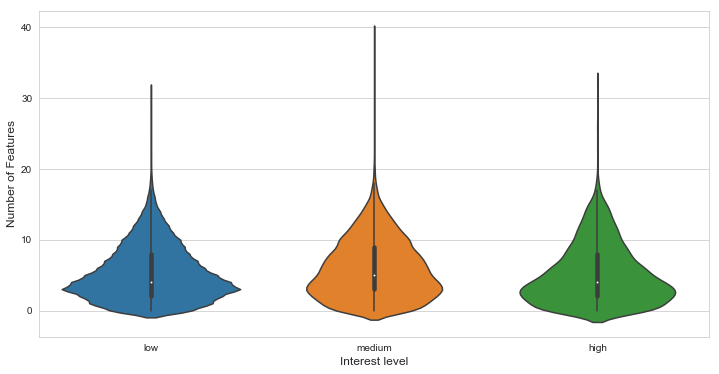

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(train_df["num_features"],hue=train_df['interest_level'],hue_order=['low', 'medium', 'high'])
plt.xlabel('Number of features')
plt.ylabel('Number of occurrences')

plt.figure(figsize=(12,6))
sns.violinplot(train_df['interest_level'],train_df['num_features'],order=["low","medium","high"])
plt.xlabel("Interest level",fontsize=12)
plt.ylabel("Number of Features",fontsize=12)
plt.show()

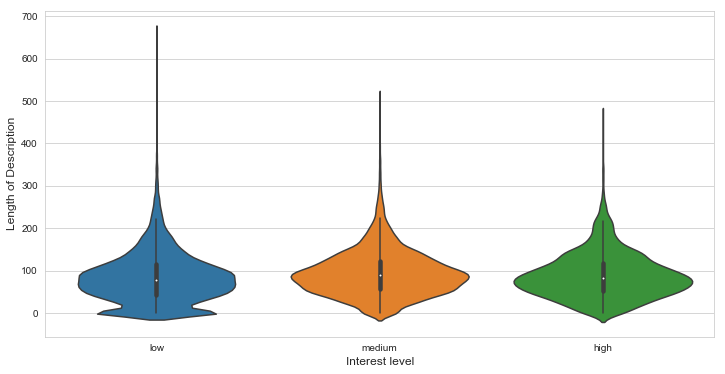

In [19]:
train_df["des_length"] = train_df["description"].apply(lambda string: sum (1 for word in string.split()))
test_df["des_length"] = test_df["description"].apply(lambda string: sum (1 for word in string.split()))
plt.figure(figsize=(12,6))
sns.violinplot(train_df['interest_level'],train_df['des_length'],order=["low","medium","high"])
plt.xlabel("Interest level",fontsize=12)
plt.ylabel("Length of Description",fontsize=12)
plt.show()

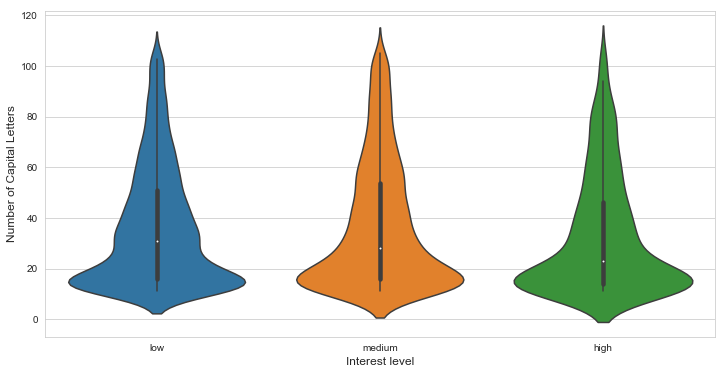

In [32]:
import re
train_df["des_capital"] = train_df["description"].apply(lambda string: len(re.findall(r'([A-Z]{3,})',string)))
test_df["des_capital"] = test_df["description"].apply(lambda string: len(re.findall(r'([A-Z]{3,})',string)))
max_limit = np.percentile(train_df.des_capital.values, 99)
min_limit = np.percentile(train_df.des_capital.values, 80)
within_limit = (train_df['des_capital']<max_limit) & (train_df['des_capital']>min_limit)
plt.figure(figsize=(12,6))
sns.violinplot(train_df['interest_level'].loc[within_limit],train_df['des_capital'].loc[within_limit],order=["low","medium","high"])
plt.xlabel("Interest level",fontsize=12)
plt.ylabel("Number of Capital Letters",fontsize=12)
plt.show()

Text(0, 0.5, 'Number of occurrences')

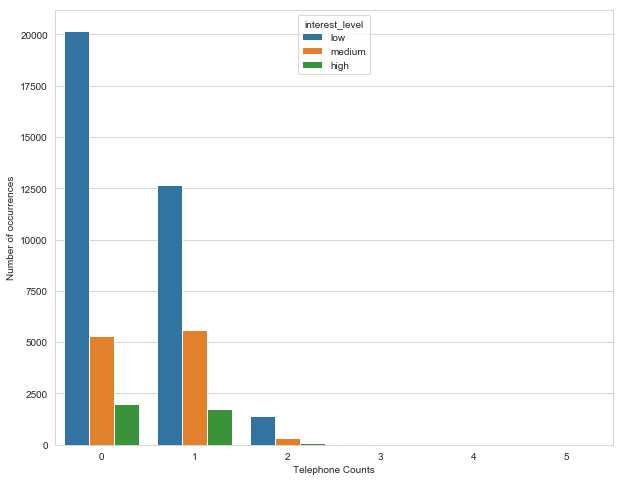

In [21]:
train_df["tele_count"] = train_df["description"].apply(lambda string: len(re.findall(r'\(*[0-9]{3}[0-9\-\.\)] *[0-9]{3}[\-\.]*[0-9]{4}',string)))
test_df["tele_count"] = test_df["description"].apply(lambda string: len(re.findall(r'\(*[0-9]{3}[0-9\-\.\)] *[0-9]{3}[\-\.]*[0-9]{4}',string)))
plt.figure(figsize=(10,8))
sns.countplot(train_df["tele_count"],hue=train_df['interest_level'],hue_order=['low', 'medium', 'high'])
plt.xlabel('Telephone Counts')
plt.ylabel('Number of occurrences')

Text(0, 0.5, 'Number of occurrences')

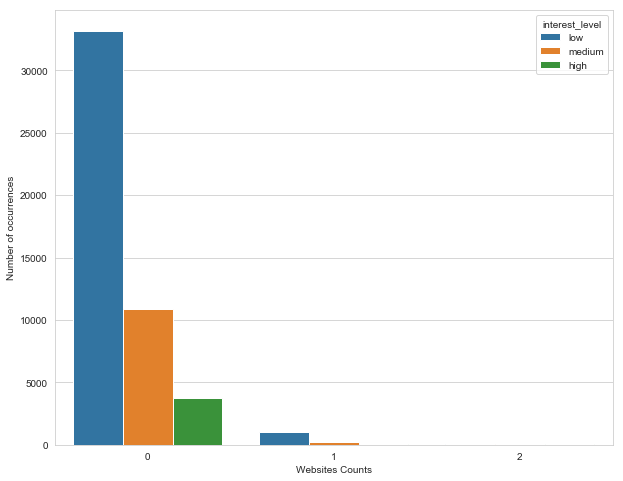

In [22]:
train_df["web_count"] = train_df["description"].apply(lambda string: len(re.findall(r'www\.\w+\.\w+',string)))
test_df["web_count"] = test_df["description"].apply(lambda string: len(re.findall(r'www\.\w+\.\w+',string)))
plt.figure(figsize=(10,8))
sns.countplot(train_df["web_count"],hue=train_df['interest_level'],hue_order=['low', 'medium', 'high'])
plt.xlabel('Websites Counts')
plt.ylabel('Number of occurrences')

Text(0, 0.5, 'Number of occurrences')

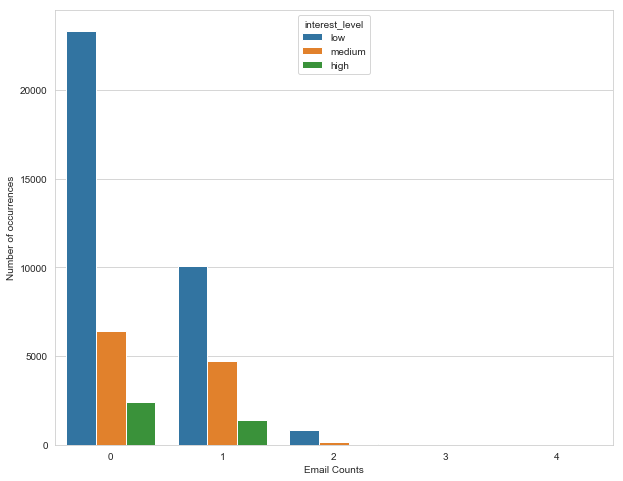

In [23]:
train_df["email_count"] = train_df["description"].apply(lambda string: len(re.findall(r'\w+@\w+\.\w+',string)))
test_df["email_count"] = test_df["description"].apply(lambda string: len(re.findall(r'\w+@\w+\.\w+',string)))
plt.figure(figsize=(10,8))
sns.countplot(train_df["email_count"],hue=train_df['interest_level'],hue_order=['low', 'medium', 'high'])
plt.xlabel('Email Counts')
plt.ylabel('Number of occurrences')

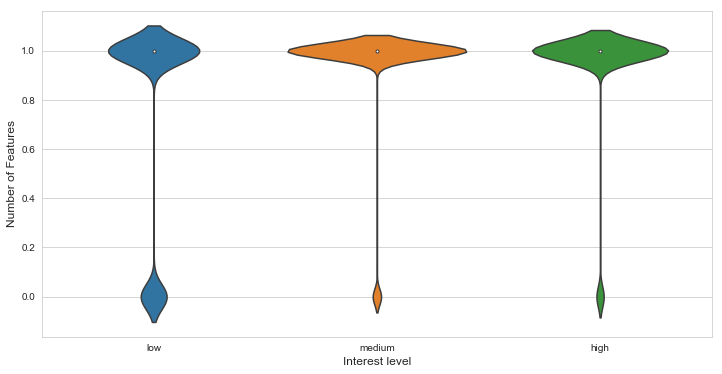

In [24]:
train_df["building_id_exist"] = train_df["building_id"].apply(lambda x: False if x=='0' else True)

plt.figure(figsize=(12,6))
sns.violinplot(train_df['interest_level'],train_df['building_id_exist'],order=["low","medium","high"])
plt.xlabel("Interest level",fontsize=12)
plt.ylabel("Number of Features",fontsize=12)
plt.show()

In [25]:
# from https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-2-connect/notebook
# convertion to Python date
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["date"] = train_df["created"].dt.date

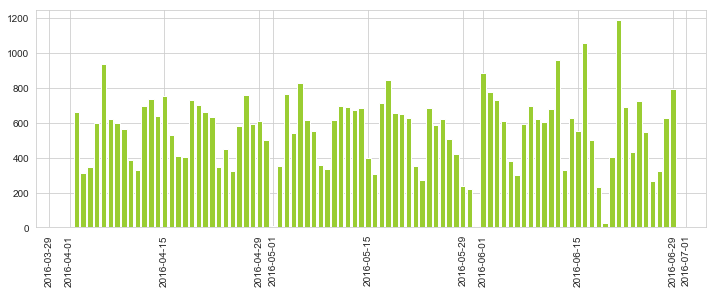

In [26]:
plt.figure(figsize=(12,4))
# count frequence of each date
date_series = train_df['date'].value_counts()
# use bar chart so that the date is shown every two weeks
plt.bar(date_series.index, date_series.values, color='yellowgreen')
# display the date vertically
plt.xticks(rotation='vertical')
plt.show()

In [27]:
# from https://www.kaggle.com/neviadomski/data-exploration-two-sigma-renthop
# convertion to month, day_of_week and hour
train_df.created = pd.to_datetime(train_df["created"], format='%Y-%m-%d %H:%M:%S')
train_df['month'] = train_df["created"].dt.month
train_df['day_of_week'] = train_df.created.dt.weekday_name
train_df['hour'] = train_df.created.dt.hour

Text(0, 0.5, 'Number of occurrences')

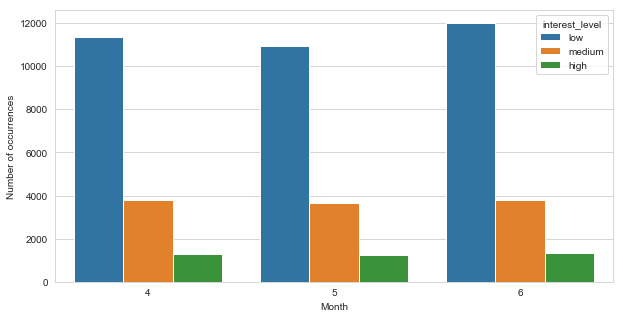

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(train_df['month'],hue=train_df['interest_level'],hue_order=['low', 'medium', 'high'])
plt.xlabel('Month')
plt.ylabel('Number of occurrences')

Text(0, 0.5, 'Number of occurrences')

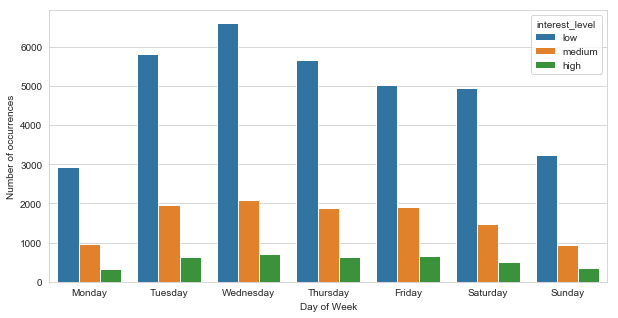

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(train_df["day_of_week"],order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],
                   hue=train_df['interest_level'],hue_order=['low', 'medium', 'high'])
plt.xlabel('Day of Week')
plt.ylabel('Number of occurrences')

Text(0, 0.5, 'Number of occurrences')

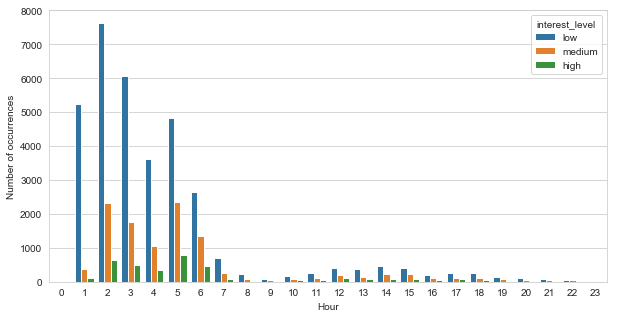

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(train_df['hour'],hue=train_df['interest_level'],hue_order=['low', 'medium', 'high'])
plt.xlabel('Hour')
plt.ylabel('Number of occurrences')

Text(25.978472222222223, 0.5, 'Latitude')

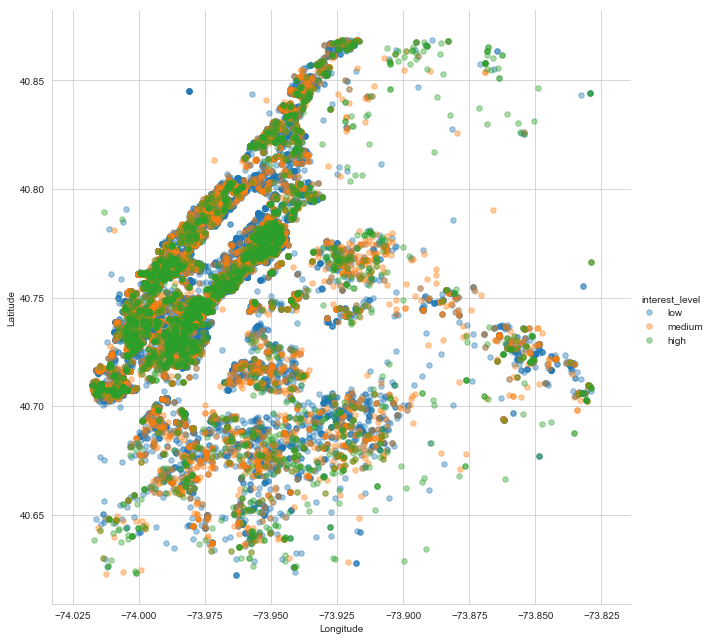

In [31]:
codes = {'high':1, 'medium':2, 'low':3}
train_df['interest_num'] = train_df['interest_level'].map(codes)

# from https://www.kaggle.com/neviadomski/data-exploration-two-sigma-renthop
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], height=9, scatter_kws={'alpha':0.4,'s':30},
           data=train_df[(train_df.longitude>train_df.longitude.quantile(0.005))
                           &(train_df.longitude<train_df.longitude.quantile(0.995))
                           &(train_df.latitude>train_df.latitude.quantile(0.005))                           
                           &(train_df.latitude<train_df.latitude.quantile(0.995))])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [34]:
corr_matrix = train_df.corr()
corr_matrix["interest_num"].sort_values(ascending=False)

interest_num         1.000000
price                0.214137
bathrooms            0.080987
listing_id           0.026487
month                0.005175
longitude            0.004752
web_count            0.001365
latitude            -0.004804
num_features        -0.025540
bedrooms            -0.027293
num_photos          -0.041561
des_length          -0.055082
email_count         -0.056414
tele_count          -0.063765
des_capital         -0.085933
hour                -0.164659
building_id_exist   -0.197558
Name: interest_num, dtype: float64

In [35]:
#write the cleaned test data into a csv file
train_df.to_json('processed_train.json')
test_df.to_json('processed_test.json')